In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('D:/fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

df.shape

(1304, 1)

In [3]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df.loc[(df['value']>=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]

df.shape

(1238, 1)

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

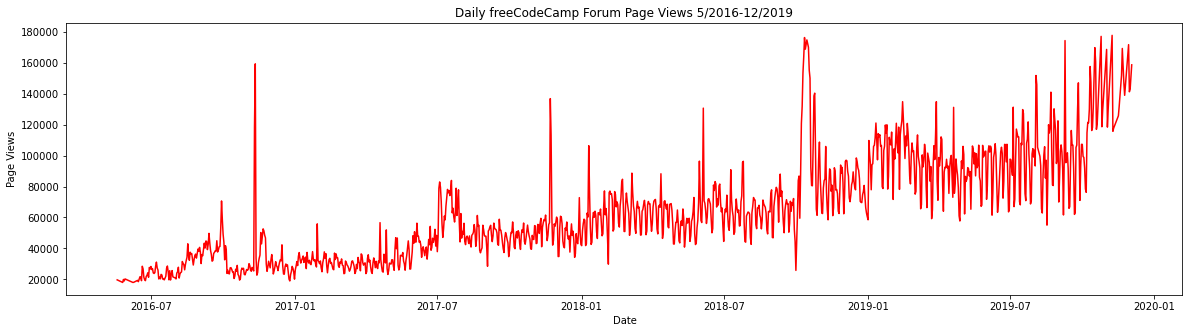

In [4]:
fig = plt.figure(figsize=(20,5))
plt.plot(df,'r-')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

<AxesSubplot:xlabel='Years', ylabel='Average Page Views'>

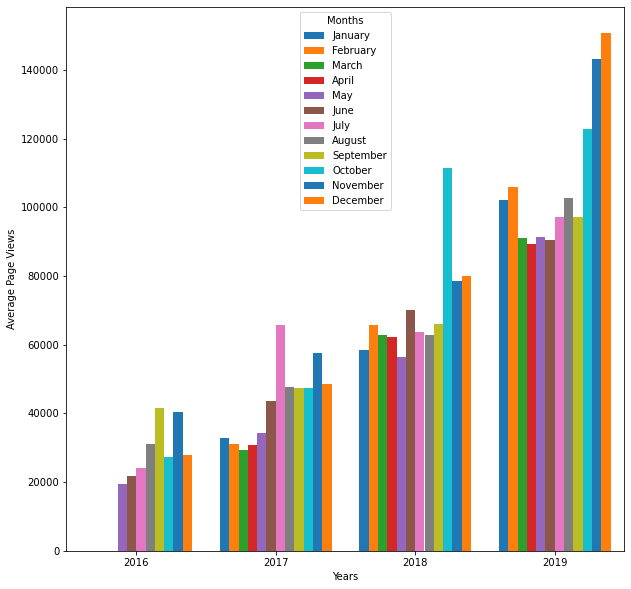

In [5]:
df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar['Years'], df_bar['Months'] = df_bar['date'].dt.year , df_bar['date'].dt.month_name()
df_bar.rename(columns={'value': 'Average Page Views'}, inplace=True)


fig = plt.figure(figsize = (10, 10))

sns.barplot(data=df_bar, x ="Years", y ="Average Page Views", hue = "Months", hue_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],  ci = 0, saturation = 1, palette=sns.color_palette())


[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

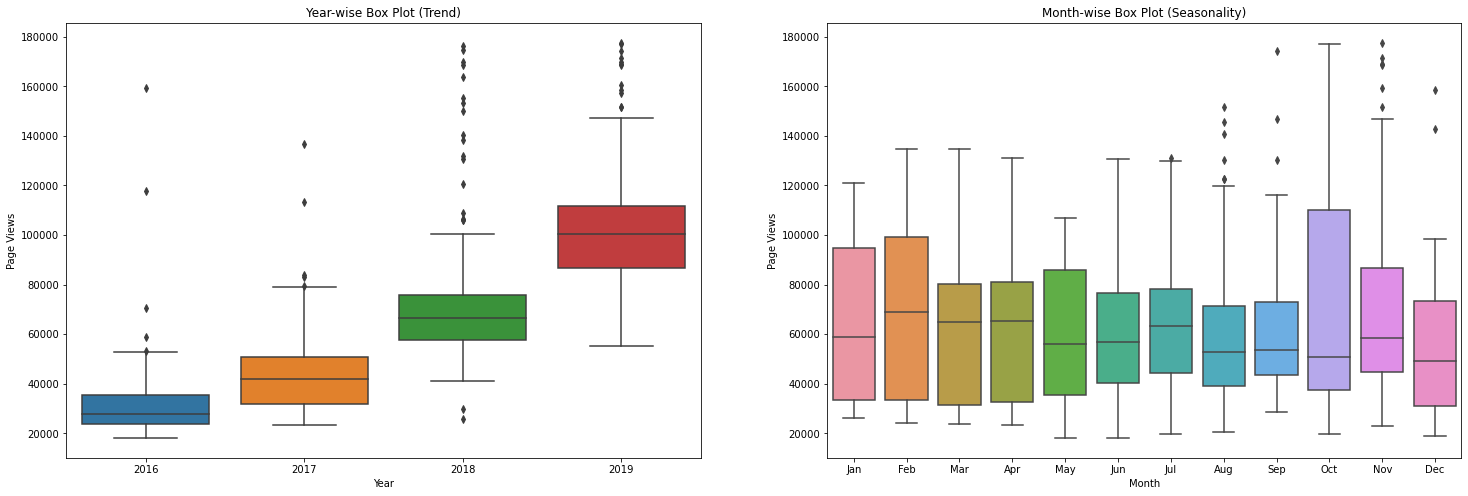

In [6]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = [d.year for d in df_box.date]
df_box['Month'] = [d.strftime('%b') for d in df_box.date]
df_box.rename(columns={'value': 'Page Views'}, inplace=True)


# Draw box plots (using Seaborn)

fig, axes = plt.subplots(1, 2, figsize=(25,8))

sns.boxplot(data=df_box, x='Year', y='Page Views', ax=axes[0]).set(title='Year-wise Box Plot (Trend)')
sns.boxplot(data=df_box, x='Month', y='Page Views', ax=axes[1], order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]).set(title='Month-wise Box Plot (Seasonality)')
